In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/ovlathkar/Random_Forest/refs/heads/main/Company_Data.csv'
df = pd.read_csv(url)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


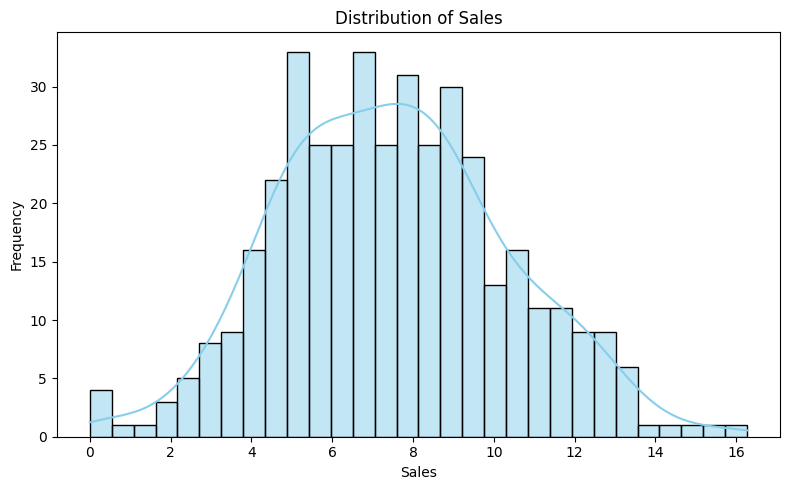

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

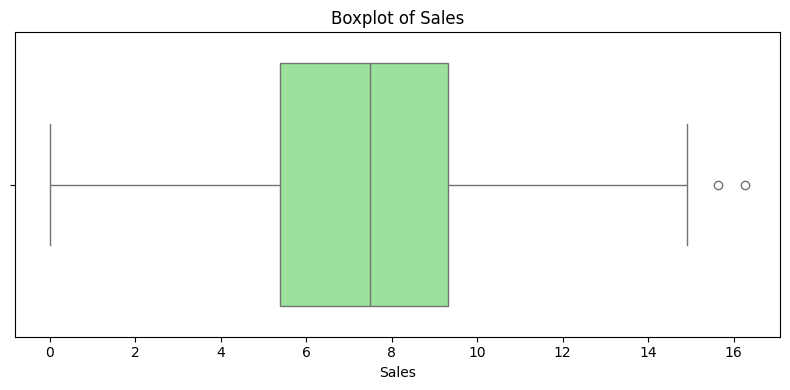

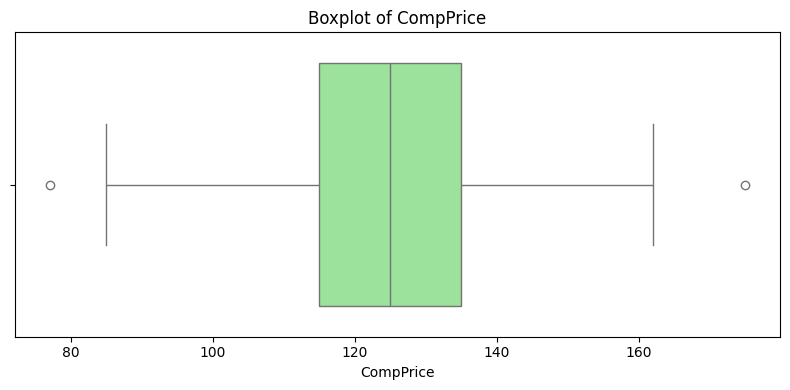

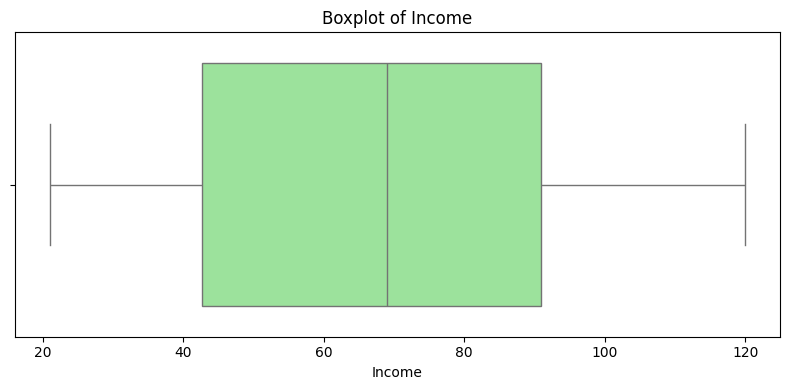

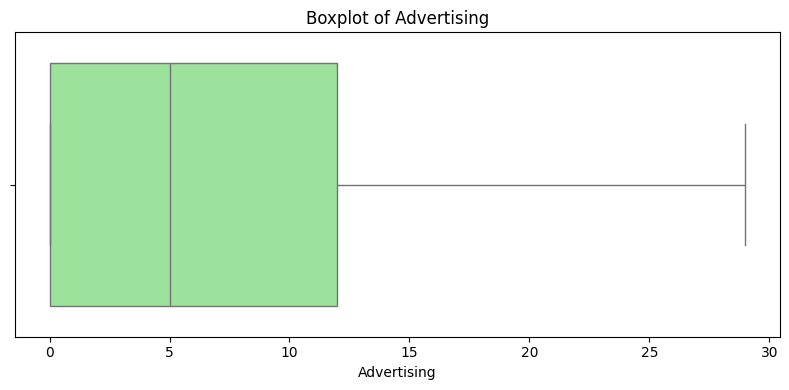

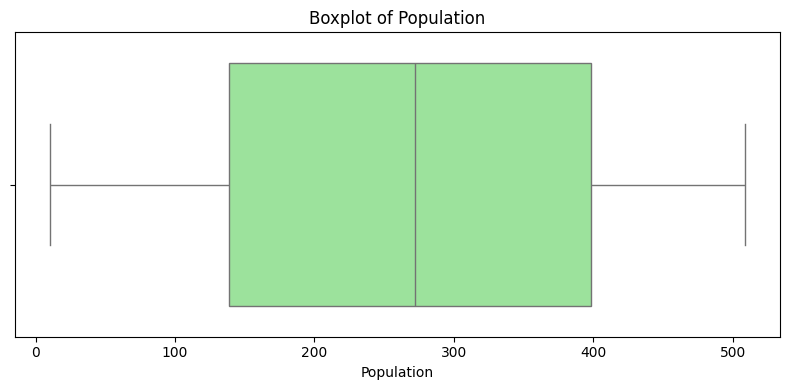

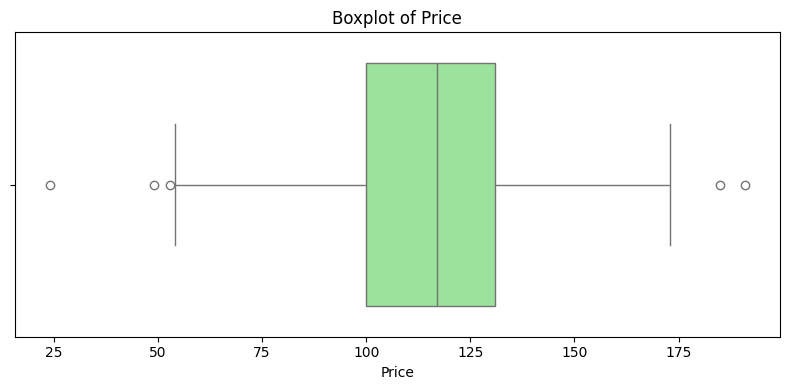

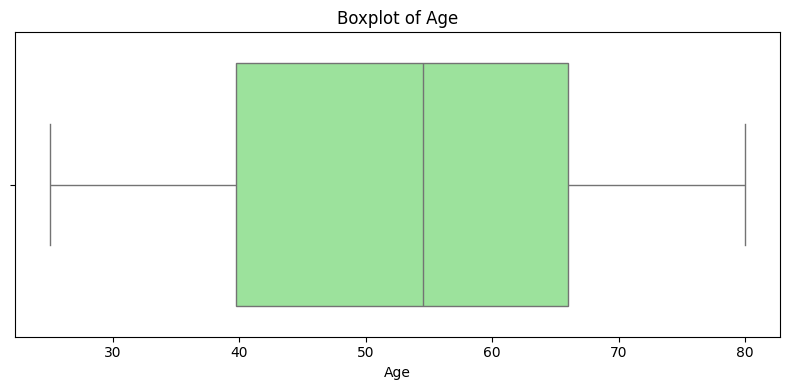

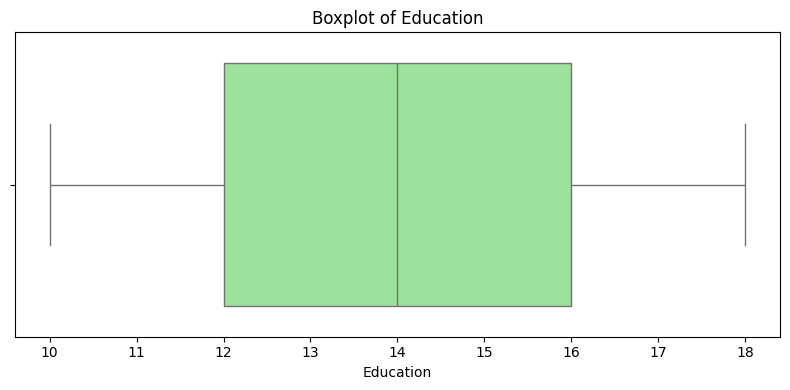

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

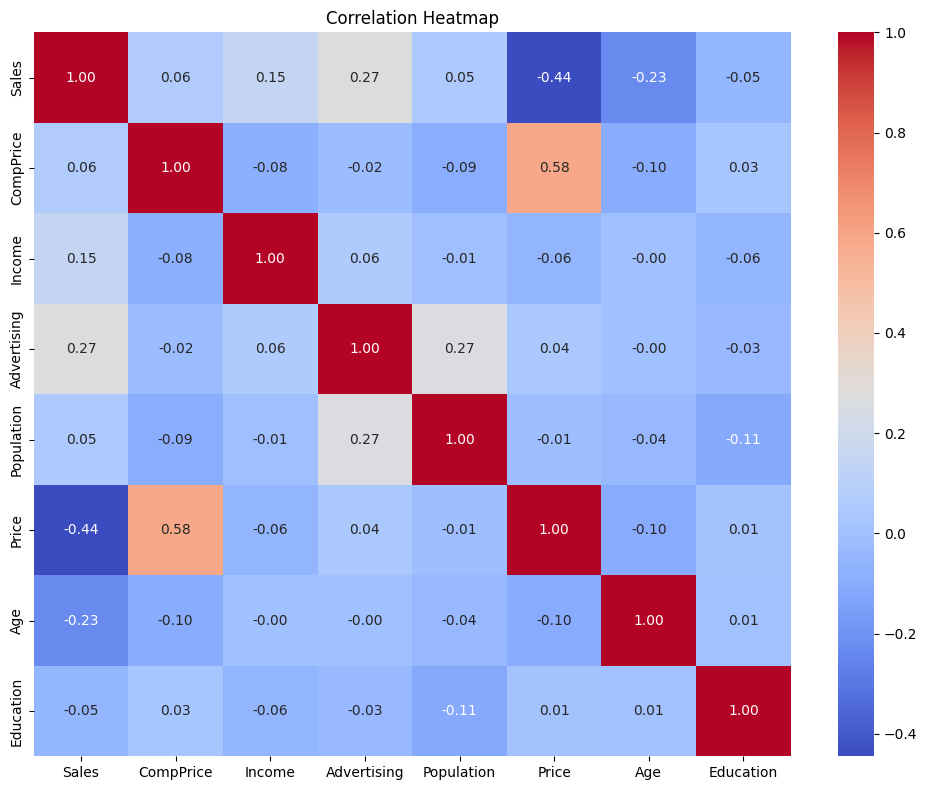

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [12]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
categorical_cols
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [13]:
X = df_encoded.drop(columns=['Sales'])
y = df_encoded['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
y_pred = rf_model.predict(X_test)
y_pred

array([ 6.1496,  5.1873,  9.7299,  5.233 ,  8.1957,  5.1748, 10.4371,
        7.3871,  9.3391,  9.2236,  5.933 ,  8.9157,  9.4743,  6.9988,
        7.5287,  9.5378,  6.951 , 11.7442,  8.3122,  7.026 ,  9.4859,
        4.8523,  6.9007,  5.3214,  6.4654,  6.9468,  7.4461,  7.7084,
        7.2512,  4.452 , 10.5696, 10.4119,  5.9348,  3.8072, 10.1108,
        5.996 ,  5.8653,  8.304 ,  9.7111,  4.7396,  4.4262,  5.3725,
        9.967 , 10.7145,  8.6063,  7.3366,  6.4492,  8.7642,  5.8753,
        6.3904, 10.7929,  8.3609,  7.4302,  8.9917,  7.8783,  4.7405,
        5.7456, 10.139 , 11.2786,  8.8036,  8.3232,  9.9783,  6.9827,
        4.8928,  7.881 ,  7.9573, 10.3286,  8.424 ,  6.2364, 10.2021,
        6.5608,  7.4928,  8.6746,  4.4298,  7.9353,  7.055 ,  7.2032,
        9.2881,  6.5875,  7.7752])

In [16]:
print("Model Evaluation")
print("R-squared (R2):", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Model Evaluation
R-squared (R2): 0.6833079097817256
MAE 1.4424449999999998
MSE 3.134049049999999
RMSE 1.7703245606385285


<ipython-input-19-67a1b6b6ae2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features_sorted, palette="viridis")


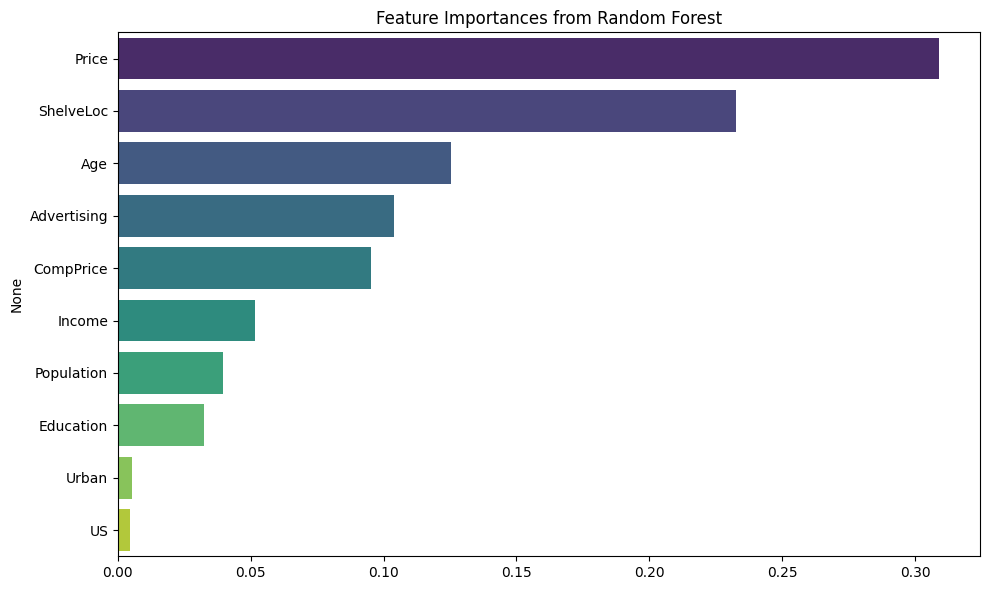

In [19]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = X.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features_sorted, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()